In [1]:
from transformers import GPT2LMHeadModel

c:\Users\carlk\source\repos\build_nanogpt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

Loading weights: 100%|██████████| 148/148 [00:00<00:00, 168.70it/s, Materializing param=transformer.wte.weight]             


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

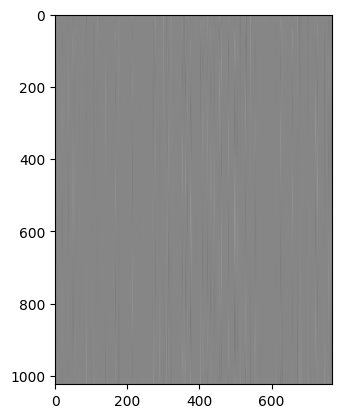

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

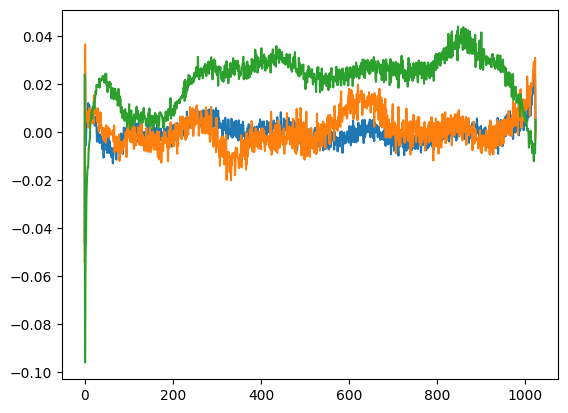

In [6]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

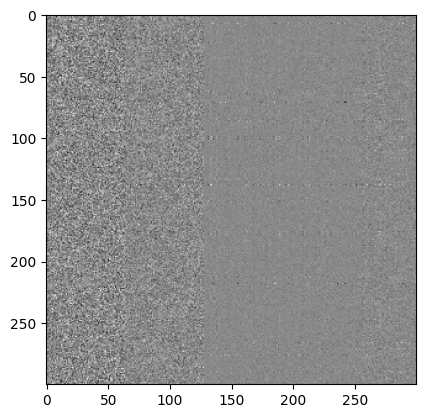

In [7]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")

In [9]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Loading weights: 100%|██████████| 148/148 [00:00<00:00, 181.24it/s, Materializing param=transformer.wte.weight]             
Passing `generation_config` together with generation-related arguments=({'num_return_sequences', 'max_length'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello, I'm a language model, I'm a language model. In my mind, I'm doing the same thing as you. All these different people are thinking about the same thing.\n\nI'm not talking about what the computer program does. I'm talking about what I'm thinking about. I'm thinking about what my body is thinking about. I'm thinking about what I'm making it. I'm thinking about what I'm making it. What my body is doing. I'm thinking about what my body is thinking about. What's my body doing? What's my body doing? What's my body doing?\n\nLet's talk about this, I'm not a computer programmer. I'm not a software developer. I'm not a computer programmer. I'm not a language model. I'm not a language model. My body is thinking about what I'm doing. What is my body doing? What's my body doing? What's my body doing?\n\nNow, I'm not saying that this is a good thing. But if you want to get better at programming, you can get better at writing. You can get better at being human. You can get

In [ ]:
import torch 
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
model.eval()
torch.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11]

Loading weights: 100%|██████████| 148/148 [00:00<00:00, 171.23it/s, Materializing param=transformer.wte.weight]             


In [1]:
# tiny shakespeare dataset 
import requests

url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
response = requests.get(url)

# This saves the file to your computer
with open('input.txt', 'w', encoding='utf-8') as f:
    f.write(response.text)
with open ('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [2]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [3]:
import torch 
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])
